<h1>EDA</h1>

Importamos librerias

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importamos nuestro dataframe

In [10]:
df = pd.read_parquet('../data/ETL.parquet')

In [8]:
df.columns.values

array(['Precio', 'ItemId', 'Año_Lanzamiento', 'Recomendado',
       'Sentimiento', 'TiempoJugado', 'Etiquetas_2D', 'Etiquetas_Action',
       'Etiquetas_Adventure', 'Etiquetas_Anime', 'Etiquetas_Atmospheric',
       'Etiquetas_Casual', 'Etiquetas_Co-op', 'Etiquetas_Difficult',
       'Etiquetas_Early Access', 'Etiquetas_Fantasy',
       'Etiquetas_Female Protagonist', 'Etiquetas_Free to Play',
       'Etiquetas_Funny', 'Etiquetas_Great Soundtrack',
       'Etiquetas_Horror', 'Etiquetas_Indie', 'Etiquetas_Multiplayer',
       'Etiquetas_Open World', 'Etiquetas_Pixel Graphics',
       'Etiquetas_Platformer', 'Etiquetas_Puzzle', 'Etiquetas_RPG',
       'Etiquetas_Racing', 'Etiquetas_Sci-fi', 'Etiquetas_Shooter',
       'Etiquetas_Simulation', 'Etiquetas_Singleplayer',
       'Etiquetas_Sports', 'Etiquetas_Story Rich', 'Etiquetas_Strategy'],
      dtype=object)


Se crea una nueva variable caracteristicas_binarias que contiene el DataFrame original df con columnas eliminadas. Las columnas eliminadas son: 'ItemId', 'Precio', 'TiempoJugado', 'Recomendado', 'Sentimiento', y 'Año_Lanzamiento'. Estas columnas se eliminan del DataFrame utilizando el método drop con el argumento axis=1 para indicar que se están eliminando columnas.

Se calcula la suma de los valores de cada característica binaria en el DataFrame resultante. Esto se hace con el método sum().

Se ordenan las sumas de las características binarias en orden descendente utilizando el método sort_values(ascending=False).

Se toman solo las 10 primeras características binarias utilizando el método head(10).

Se crea una figura de matplotlib con un tamaño de 10x6 pulgadas utilizando plt.figure(figsize=(10, 6)).

Se traza un gráfico de barras apiladas utilizando suma_caracteristicas.plot(kind='bar', stacked=True). Esto muestra la cantidad de juegos con cada etiqueta para las 10 primeras características binarias.

Se establece el título del gráfico utilizando plt.title('Top 10 de Etiquetas más usadas en los juegos').

Se establecen las etiquetas de los ejes x e y utilizando plt.xlabel('Característica') y plt.ylabel('Cantidad de juegos con esta etiqueta').

Se rotan las etiquetas del eje x en 45 grados para mejorar la legibilidad utilizando plt.xticks(rotation=45).

Se muestra el gráfico utilizando plt.show().

En resumen, este código elimina ciertas columnas del DataFrame original, calcula la suma de los valores de las características binarias restantes, encuentra las 10 características binarias más comunes y luego traza un gráfico de barras que muestra la cantidad de juegos con cada una de esas características.

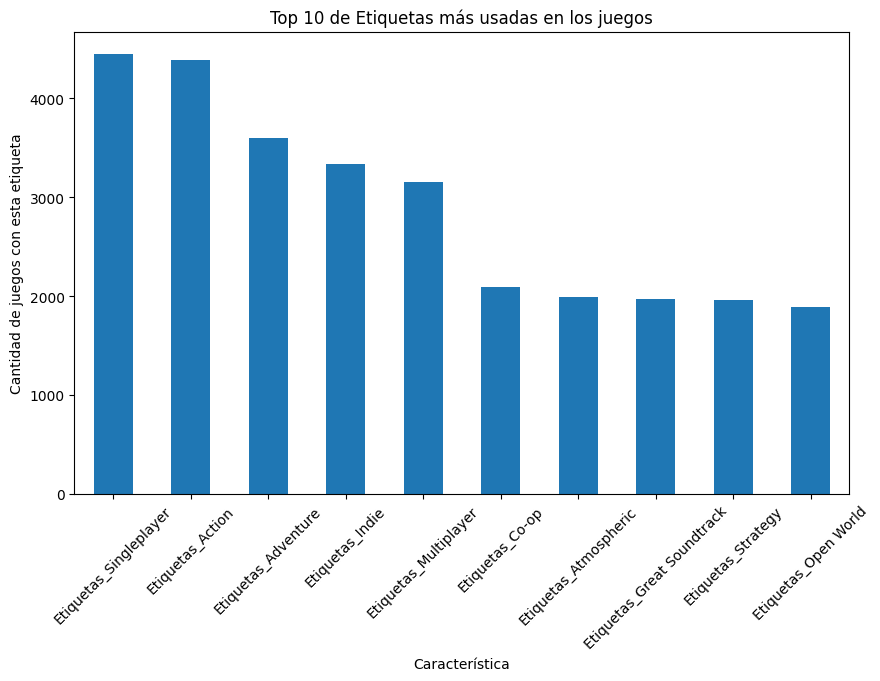

In [13]:
caracteristicas_binarias = df.drop(['ItemId', 'Precio', 'TiempoJugado', 'Recomendado', 'Sentimiento', 'Año_Lanzamiento'], axis=1)
# Suma los valores de cada característica binaria
suma_caracteristicas = caracteristicas_binarias.sum()
suma_caracteristicas = suma_caracteristicas.sort_values(ascending=False)

# Tomar solo las 10 primeras características binarias
suma_caracteristicas = suma_caracteristicas.head(10)
plt.figure(figsize=(10, 6))
suma_caracteristicas.plot(kind='bar', stacked=True)
plt.title('Top 10 de Etiquetas más usadas en los juegos')
plt.xlabel('Característica')
plt.ylabel('Cantidad de juegos con esta etiqueta')
plt.xticks(rotation=45)
plt.show()

Selecciona las columnas 'ItemId' y 'TiempoJugado' del DataFrame original df, creando un nuevo DataFrame llamado dfEt_Tiempo_Item.

Elimina las filas duplicadas en el nuevo DataFrame dfEt_Tiempo_Item, asegurando que cada ItemId sea único en el DataFrame resultante.

Extrae dos columnas del DataFrame resultante: 'ItemId' y 'TiempoJugado', asignándolas a las variables id_items y tiempo_jugado_promedio, respectivamente.

Utiliza matplotlib para crear un gráfico de dispersión que muestra la relación entre el ItemId y el tiempo jugado promedio para cada juego en el DataFrame. Cada punto en el gráfico representa un juego, donde el eje x representa el ItemId y el eje y representa el tiempo jugado promedio.

Se establecen títulos y etiquetas para los ejes del gráfico, así como una cuadrícula para facilitar la lectura de los valores.

Se muestra el gráfico generado.

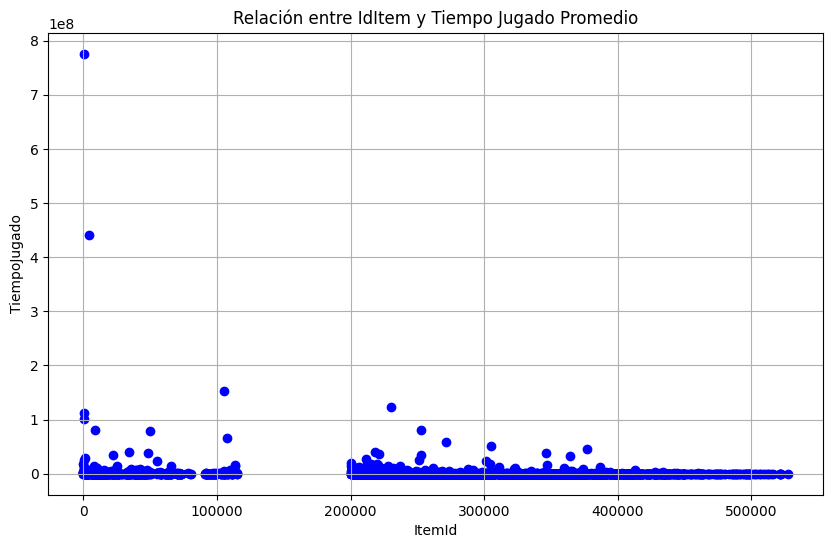

In [21]:
dfEt_Tiempo_Item = df[['ItemId', 'TiempoJugado']]
dfEt_Tiempo_Item = dfEt_Tiempo_Item.drop_duplicates()
id_items = dfEt_Tiempo_Item["ItemId"]
tiempo_jugado_promedio = dfEt_Tiempo_Item["TiempoJugado"]
plt.figure(figsize=(10, 6))
plt.scatter(id_items, tiempo_jugado_promedio, color='blue')
plt.title('Relación entre IdItem y Tiempo Jugado Promedio')
plt.xlabel('ItemId')
plt.ylabel('TiempoJugado')
plt.grid(True)
plt.show()

Selecciona un subconjunto de columnas del DataFrame original df, que incluye las columnas 'Precio', 'ItemId', 'Año_Lanzamiento', 'Recomendado', 'Sentimiento' y 'TiempoJugado'. 

Este subconjunto se almacena en un nuevo DataFrame llamado dfCorrelacion.

Calcula la matriz de correlación entre estas columnas utilizando el método corr() del DataFrame dfCorrelacion. La matriz de correlación muestra cómo están relacionadas linealmente estas variables entre sí. Los valores de correlación oscilan entre -1 y 1, donde 1 significa una correlación positiva perfecta, -1 significa una correlación negativa perfecta, y 0 significa ausencia de correlación lineal.

Utiliza Seaborn para trazar un mapa de calor (heatmap) de la matriz de correlación. En este mapa de calor, cada celda representa el valor de correlación entre variables.

Se establece un título para el mapa de calor utilizando plt.title('Matriz de Correlación').

Se muestra el mapa de calor utilizando plt.show().

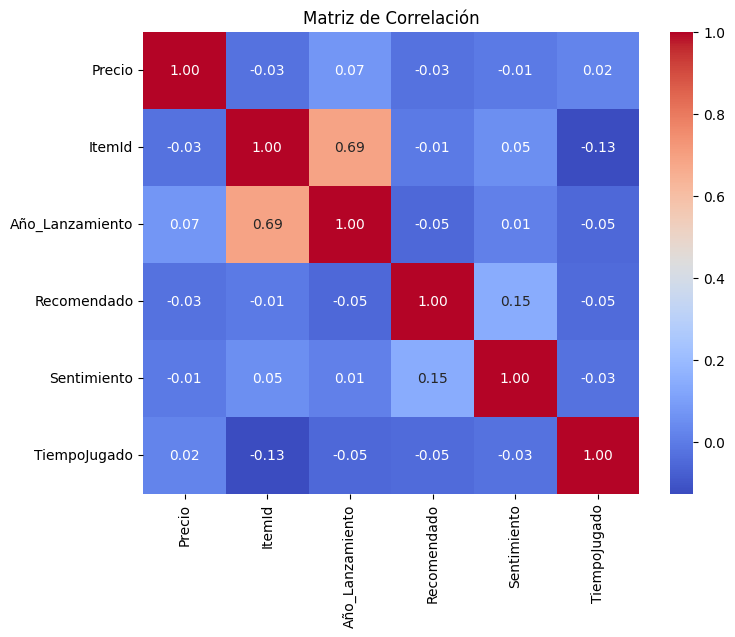

In [24]:
dfCorrelacion = df[['Precio', 'ItemId', 'Año_Lanzamiento', 'Recomendado', 'Sentimiento', 'TiempoJugado']]
correlacion = dfCorrelacion.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Precio vs. todas las demás variables:

El coeficiente de correlación entre el precio y las otras variables es cercano a cero en general, lo que indica una correlación débil o nula. Esto sugiere que el precio de un juego no está fuertemente relacionado linealmente con las otras variables en el conjunto de datos.

ItemId vs. las demás variables:

Existe una correlación moderada positiva (0.687) entre el ItemId y el Año_Lanzamiento, lo que sugiere que los juegos con ItemId más altos tienden a haber sido lanzados más recientemente.

Hay una correlación moderada negativa (-0.127) entre el ItemId y el TiempoJugado, lo que podría indicar que los juegos con ItemId más altos tienden a ser jugados menos tiempo.

Año_Lanzamiento vs. Sentimiento:

Hay una correlación moderada positiva (0.145) entre el Año_Lanzamiento y el Recomendado, lo que sugiere que los juegos lanzados más recientemente tienden a recibir más recomendaciones.

Existe una correlación moderada negativa (-0.055) entre el Año_Lanzamiento y el TiempoJugado, lo que podría indicar que los juegos más antiguos tienden a ser jugados durante menos tiempo.

Recomendado vs. Sentimiento:

Hay una correlación moderada positiva (0.145) entre el Recomendado y el Sentimiento, lo que sugiere que los juegos con más recomendaciones tienden a tener un sentimiento más positivo.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

División de datos por sentimiento:

Selecciona las filas del DataFrame original df donde el valor de la columna 'Sentimiento' es 0, 1 o 2, y las asigna a tres DataFrames separados: negativos, neutrales y positivos.

Creación del diagrama de dispersión:

Se crea una figura de tamaño 8x6 pulgadas utilizando plt.figure(figsize=(8, 6)).

Se traza un punto de dispersión para cada grupo (negativos, neutrales y positivos) en el diagrama utilizando plt.scatter().

Los puntos para cada grupo se trazan con diferentes colores: azul para negativos, gris para neutrales y verde para positivos.

El eje x representa el precio y el eje y representa el sentimiento.

El parámetro alpha=0.5 controla la transparencia de los puntos para que sea más fácil distinguir los puntos superpuestos.

Se establece una etiqueta para cada grupo en la leyenda utilizando el argumento label en plt.scatter().

Se establecen etiquetas para los ejes x e y con plt.xlabel() y plt.ylabel(), respectivamente.

Se establece un título para el diagrama con plt.title().

Se agrega una leyenda al diagrama con plt.legend() para identificar los diferentes grupos.

Se activa la cuadrícula en el diagrama con plt.grid(True) para facilitar la lectura de los valores.

Mostrar el diagrama:

Se muestra el diagrama utilizando plt.show().

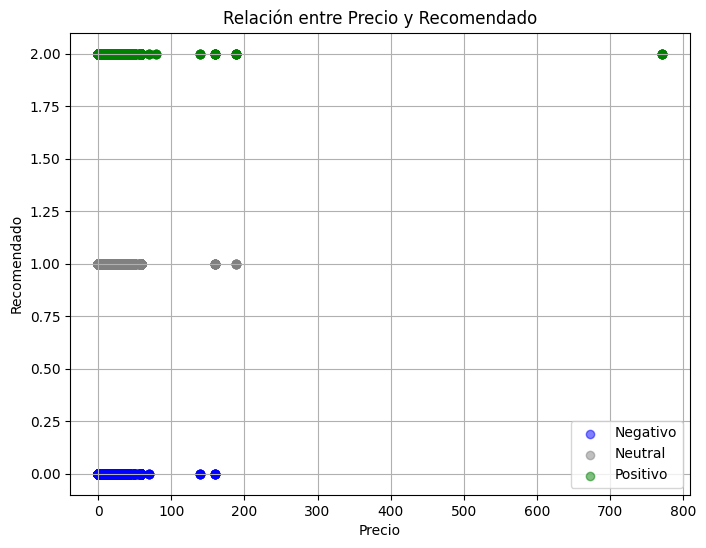

In [29]:
# Dividir los datos en tres grupos: negativos, neutrales y positivos
negativos = df[df['Sentimiento'] == 0]
neutrales = df[df['Sentimiento'] == 1]
positivos = df[df['Sentimiento'] == 2]

# Crear un diagrama de dispersión con colores diferentes para cada grupo
plt.figure(figsize=(8, 6))
plt.scatter(negativos['Precio'], negativos['Sentimiento'], color='blue', alpha=0.5, label='Negativo')
plt.scatter(neutrales['Precio'], neutrales['Sentimiento'], color='gray', alpha=0.5, label='Neutral')
plt.scatter(positivos['Precio'], positivos['Sentimiento'], color='green', alpha=0.5, label='Positivo')
plt.xlabel('Precio')
plt.ylabel('Recomendado')
plt.title('Relación entre Precio y Recomendado')
plt.legend()
plt.grid(True)
plt.show()

División de los datos por recomendación:

Los datos se dividen en tres grupos según el valor de la columna 'Recomendado': recomendados, neutrales y no recomendados.

Definición de los rangos de precios:

Se especifican los intervalos de precios en los que se agruparán los ítems. Estos rangos ayudarán a visualizar cómo se distribuyen los ítems en diferentes rangos de precios.

Cálculo del número de ítems en cada rango de precios para cada grupo:

Se cuentan cuántos ítems caen en cada rango de precios para los grupos recomendados, neutrales y no recomendados.

Creación del gráfico de barras:

Se utiliza un gráfico de barras para representar visualmente la distribución de ítems por rango de precios y recomendación.

Cada barra en el gráfico representa el número de ítems en un rango de precios específico para cada categoría de recomendación.

Los colores de las barras se utilizan para distinguir entre los ítems recomendados, neutrales y no recomendados.

Etiquetado y visualización del gráfico:

Se etiquetan los ejes x e y del gráfico para indicar qué representan los datos.

Se agrega un título al gráfico para describir la información que se está visualizando.

Se muestra una leyenda para identificar los colores asociados con cada categoría de recomendación.

Se ajusta el diseño del gráfico para mejorar su apariencia y legibilidad.

Finalmente, se muestra el gráfico para que pueda ser interpretado y entendido fácilmente.


/tmp/ipykernel_49833/1239406268.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recomendados_por_rango = recomendados.groupby(pd.cut(recomendados['Precio'], bins)).size()
/tmp/ipykernel_49833/1239406268.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  neutrales_por_rango = neutrales.groupby(pd.cut(neutrales['Precio'], bins)).size()
/tmp/ipykernel_49833/1239406268.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning

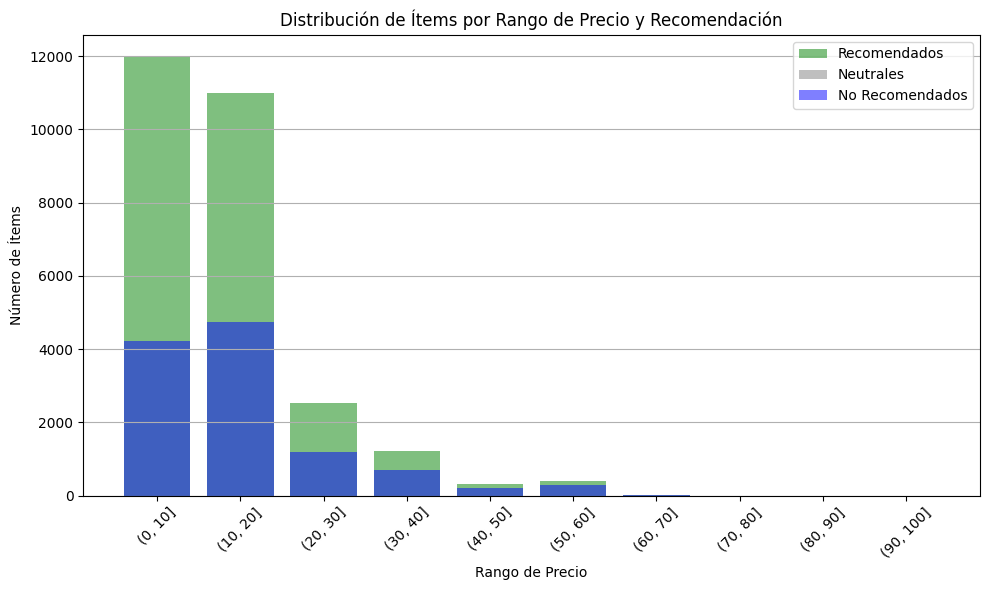

In [30]:
# Dividir los datos en tres grupos: negativos, neutrales y positivos
recomendados = df[df['Recomendado'] == 1]
neutrales = df[df['Recomendado'] == 2]
no_recomendados = df[df['Recomendado'] == 0]

# Definir los rangos de precios
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Calcular el número de ítems en cada rango de precios para cada grupo
recomendados_por_rango = recomendados.groupby(pd.cut(recomendados['Precio'], bins)).size()
neutrales_por_rango = neutrales.groupby(pd.cut(neutrales['Precio'], bins)).size()
no_recomendados_por_rango = no_recomendados.groupby(pd.cut(no_recomendados['Precio'], bins)).size()

# Crear un gráfico de barras para visualizar la distribución de ítems por rango de precios para cada grupo
plt.figure(figsize=(10, 6))
plt.bar(recomendados_por_rango.index.astype(str), recomendados_por_rango.values, color='green', alpha=0.5, label='Recomendados')
plt.bar(neutrales_por_rango.index.astype(str), neutrales_por_rango.values, color='gray', alpha=0.5, label='Neutrales')
plt.bar(no_recomendados_por_rango.index.astype(str), no_recomendados_por_rango.values, color='blue', alpha=0.5, label='No Recomendados')
plt.xlabel('Rango de Precio')
plt.ylabel('Número de Ítems')
plt.title('Distribución de Ítems por Rango de Precio y Recomendación')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

División de datos por recomendación:

Se separan los datos en dos grupos basados en el valor de la columna 'Recomendado': recomendados y no recomendados. Se crean dos DataFrames, recomendados y no_recomendados, que contienen los datos correspondientes a los juegos recomendados y no recomendados, respectivamente.

Creación del diagrama de dispersión:

Se utiliza un diagrama de dispersión para visualizar la relación entre el tiempo jugado promedio y la recomendación de los juegos.

Se trazan los puntos de dispersión para cada grupo (recomendados y no_recomendados) en el diagrama.

Los puntos para los juegos no recomendados se trazan en color azul, mientras que los puntos para los juegos recomendados se trazan en color verde.

El eje x representa el tiempo jugado promedio y el eje y representa la recomendación (1 para recomendado, 0 para no recomendado).

Se establece una transparencia (alpha) de 0.5 para que los puntos superpuestos sean más visibles.

Se añaden etiquetas para los puntos trazados, indicando si son recomendados o no recomendados.

Se etiquetan los ejes x e y del gráfico con 'Precio' y 'Recomendado', respectivamente.

Se establece un título para el diagrama con 'Relación entre Tiempo_Jugado_Promedio y Recomendado'.

Se añade una leyenda al gráfico para identificar los puntos correspondientes a juegos recomendados y no recomendados.

Se activa la cuadrícula en el gráfico para facilitar la lectura de los valores.

Mostrar el diagrama:

Se muestra el diagrama de dispersión generado. Esto permite visualizar de manera clara cómo se distribuyen los puntos de acuerdo al tiempo jugado promedio y la recomendación de los juegos.


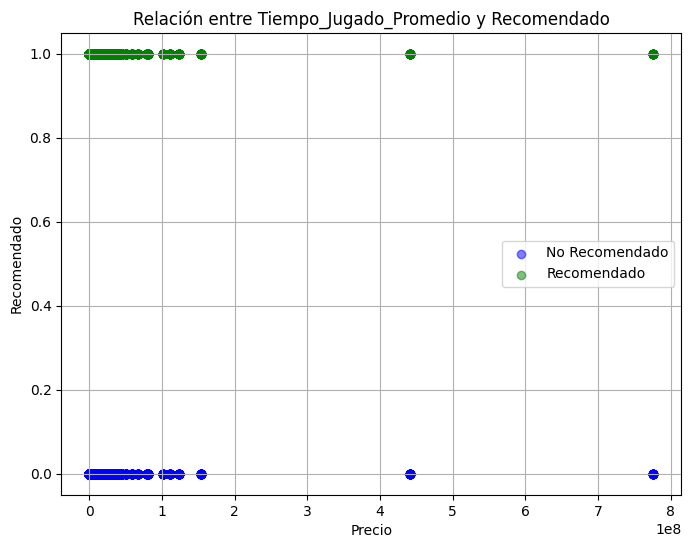

In [31]:
# Dividir los datos en dos grupos: recomendados y no recomendados
recomendados = df[df['Recomendado'] == 1]
no_recomendados = df[df['Recomendado'] == 0]

# Crear un diagrama de dispersión con colores diferentes para los puntos recomendados y no recomendados
plt.figure(figsize=(8, 6))
plt.scatter(no_recomendados['TiempoJugado'], no_recomendados['Recomendado'], color='blue', alpha=0.5, label='No Recomendado')
plt.scatter(recomendados['TiempoJugado'], recomendados['Recomendado'], color='green', alpha=0.5, label='Recomendado')
plt.xlabel('Precio')
plt.ylabel('Recomendado')
plt.title('Relación entre Tiempo_Jugado_Promedio y Recomendado')
plt.legend()
plt.grid(True)
plt.show()